
<a id='additive-functionals'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Funcioanais Aditivos

<a id='index-0'></a>

## Conteúdo

- [Funcionais Aditivos](#Funcionais-Aditivos)  
  - [Resumo](#Resumo)  
  - [Um Funcional Aditivo Particular](#Um-Funcional-Aditivo-Particular)  
  - [Dinâmica](#Dinâmica)  
  - [Código](#Código)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

Em co-autoria com Chase Coleman e Balint Szoke

## Resumo

Algumas séries temporais não são estacionárias.

Por exemplo, produto, preços, e dividendos são tipicamente não estacionárias, devido ao crescimento irregular, mas persistente.

Que tipos de modelos são úteis para estudar essas séries temporais?

Hansen e Scheinkman [[HS09]](https://julia.quantecon.org/../zreferences.html#hans-scheink2009) analisam duas classes de modelos de séries temporais que acomodam o crescimento.

Elas são:

1. **funcionais aditivos** que exibem “crescimento aritmético” aleatório.
1. **funcionais multiplicativos** que exibem “crescimento geométrico” aleatório.  


Essas duas classes de processos estão intimamente conectadas.

Por exemplo, se um processo $ \{y_t\} $ é um funcional aditivo e $ \phi_t = \exp(y_t) $, então $ \{\phi_t\} $ é um funcional multiplicativo.

Hansen e Sargent [[HS17]](https://julia.quantecon.org/../zreferences.html#hans-sarg-book2016)(cap. 5 e 6) descrevem versões temporais discretas de funcionais aditivos e multiplicativos

Nesta aula, discutiremos o primeiro (ou seja, funcionais aditivos).

Na próxima [aula](https://julia.quantecon.org/multiplicative_functionals.html) discutiremos funcionais multiplicativos.

Também consideramos decomposições frutíferas de processos aditivos e multiplicativos, uma discussão mais profunda sobre a qual pode ser encontrada em Hansen e Sargent [[HS17]](https://julia.quantecon.org/../zreferences.html#hans-sarg-book2016).

## Um Funcional Aditivo Particular

Esta aula tem o foco em um tipo específico de funcional aditivo: um processo escalar $ \{y_t\}_{t=0}^\infty $ cujos incrementos são conduzidos por um vetor de autoregressão gaussiana.

É simples construir, simular e analisar.

Esse funcional aditivo consiste em dois componentes, o primeiro dos quais é um  **vetor de autoregressão de primeira ordem** (VAR)


<a id='equation-old1-additive-functionals'></a>
$$
x_{t+1} = A x_t + B z_{t+1} \tag{1}
$$

Aqui:

- $ x_t $ é um vetor $ n \times 1 $,  
- $ A $ é uma matriz estável $ n \times n $ (todos os autovalores estão dentro do círculo unitário aberto),  
- $ z_{t+1} \sim {\cal N}(0,I) $ é um choque i.i.d  $ m \times 1 $,  
- $ B $ é uma matriz $ n \times m $, e  
- $ x_0 \sim {\cal N}(\mu_0, \Sigma_0) $ é uma condição aleatória inicial para $ x $  


O segundo componente é uma equação que expressa incrementos de  $ \{y_t\}_{t=0}^\infty $ como funções lineares de:

- um escalar constante $ \nu $,  
- o vetor $ x_t $, e
- o mesmo vetor Gaussiano $ z_{t+1} $ que aparece no VAR [(1)](#equation-old1-additive-functionals)  


Em particular,


<a id='equation-old2-additive-functionals'></a>
$$
y_{t+1} - y_{t} = \nu + D x_{t} + F z_{t+1} \tag{2}
$$

Aqui $ y_0 \sim {\cal N}(\mu_{y0}, \Sigma_{y0}) $ é uma condição aleatória inicial.

O processo aleatório não estacionário $ \{y_t\}_{t=0}^\infty $ exibe *crescimento aritmético* mas sistemático.

### Uma Representação Linear do Espaço de Estado

Uma maneira de representar a dinâmica geral é usar um [sistema linear de espaço de estado](https://julia.quantecon.org/../tools_and_techniques/linear_models.html).

Para fazer isso, configuramos o estado e vetores de observação:

$$
\hat{x}_t = \begin{bmatrix} 1 \\  x_t \\ y_t  \end{bmatrix}
\quad \text{e} \quad
\hat{y}_t = \begin{bmatrix} x_t \\ y_t  \end{bmatrix}
$$

Agora construimos o sistema do espaço de estado:

$$
\begin{bmatrix}
     1 \\
     x_{t+1} \\
     y_{t+1}
 \end{bmatrix}
 =
 \begin{bmatrix}
    1 & 0 & 0  \\
    0  & A & 0 \\
    \nu & D' &  1 \\
\end{bmatrix}
\begin{bmatrix}
    1 \\
    x_t \\
    y_t
\end{bmatrix} +
\begin{bmatrix}
    0 \\  B \\ F'
\end{bmatrix}
z_{t+1}
$$

$$
\begin{bmatrix}
    x_t \\
    y_t
\end{bmatrix}
= \begin{bmatrix}
    0  & I & 0  \\
    0 & 0  & 1
\end{bmatrix}
\begin{bmatrix}
    1 \\  x_t \\ y_t
\end{bmatrix}
$$

Isso pode ser escrito como:

$$
\begin{aligned}
  \hat{x}_{t+1} &= \hat{A} \hat{x}_t + \hat{B} z_{t+1} \\
  \hat{y}_{t} &= \hat{D} \hat{x}_t
\end{aligned}
$$

Que é um sistema linear de espaço de estado padrão.

Para estudar isso, poderíamos mapeá-lo em uma instância do [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) disponível em [QuantEcon.jl](http://quantecon.org/quantecon-jl).

De fato, usaremos um conjunto diferente de código para simulação, pelos motivos descritos abaixo.

## Dinâmica

Vamos executar algumas simulações para consolidar a intuição.


<a id='addfunc-eg1'></a>
Fazendo isso assumimos que $ z_{t+1} $ e escalar e que $ \tilde x_t $ segue uma autoregressão escalar de 4º ordem:


<a id='equation-ftaf'></a>
$$
\tilde x_{t+1} = \phi_1 \tilde x_{t} + \phi_2 \tilde x_{t-1} +
\phi_3 \tilde x_{t-2} +
\phi_4 \tilde x_{t-3} + \sigma z_{t+1} \tag{3}
$$

Faça o incremento em $ \{y_t\} $ obedecer:

$$
y_{t+1} - y_t =  \nu + \tilde x_t + \sigma z_{t+1}
$$

como uma condição inicial para $ y_0 $.

Embora [(3)](#equation-ftaf) não seja um sistema de primeira ordem como [(1)](#equation-old1-additive-functionals), sabemos que ele pode ser mapeado para um sistema de primeira ordem.

- para um exemplo de tal mapeamento, veja [esse caso](https://julia.quantecon.org/../tools_and_techniques/linear_models.html#lss-sode)  


De fato, todo esse modelo pode ser mapeado na definição do sistema funcional aditivo em [(1)](#equation-old1-additive-functionals) – [(2)](#equation-old2-additive-functionals) pela seleção apropriada das matrizes  $ A, B, D, F $.

Você pode tentar escrever essas matrizes agora como exercício - as expressões corretas aparecerão no código abaixo.

### Simulação

Ao simular, incorporamos nossas variáveis em um sistema maior.

Este sistema também constrói os componentes das decomposições de $ y_t $ e de $ \exp(y_t) $ proposto por Hansen e Scheinkman [[HS09]](https://julia.quantecon.org/../zreferences.html#hans-scheink2009).

Todos esses objetos são calculados usando o código abaixo.

### Setup

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

In [3]:
using Distributions, Parameters, Plots, QuantEcon
gr(fmt = :png);

In [4]:
function AMF_LSS_VAR(A, B, D, F = nothing; ν = nothing)

    if B isa AbstractVector
        B = reshape(B, length(B), 1)
    end
    # requer elementos
    nx, nk = size(B)

    # verifica a dimensão de D (estendida do caso escalar)
    if ndims(D) > 1
        nm = size(D, 1)
        if D isa Union{Adjoint, Transpose}
            D = convert(Matrix, D)
        end
    else
        nm = 1
        D = reshape(D, 1, length(D))
    end

    # define F
    if isnothing(F)
        F = zeros(nk, 1)
    elseif ndims(F) == 1
        F = reshape(F, length(F), 1)
    end

    # define ν
    if isnothing(ν)
        ν = zeros(nm, 1)
    elseif ndims(ν) == 1
        ν = reshape(ν, length(ν), 1)
    else
        throw(ArgumentError("ν must be column vector!"))
    end

    if size(ν, 1) != size(D, 1)
        error("The size of ν is inconsistent with D!")
    end

    # constroi uma representação grande do espaço de estado
    lss = construct_ss(A, B, D, F, ν, nx, nk, nm)

    return (A = A, B = B, D = D, F = F, ν = ν, nx = nx, nk = nk, nm = nm, lss = lss)
end

AMF_LSS_VAR(A, B, D) =
    AMF_LSS_VAR(A, B, D, nothing, ν=nothing)
AMF_LSS_VAR(A, B, D, F, ν) =
    AMF_LSS_VAR(A, B, D, [F], ν=[ν])

function construct_ss(A, B, D, F,
                    ν, nx, nk, nm)

    H, g = additive_decomp(A, B, D, F, nx)

    # blocos auxiliares com 0's e 1's para preencher as matrizes lss
    nx0c = zeros(nx, 1)
    nx0r = zeros(1, nx)
    nx1 = ones(1, nx)
    nk0 = zeros(1, nk)
    ny0c = zeros(nm, 1)
    ny0r = zeros(1, nm)
    ny1m = I + zeros(nm, nm)
    ny0m = zeros(nm, nm)
    nyx0m = similar(D)

    # constroi a matriz A para LSS
    # ordem dos estados é: [1, t, xt, yt, mt]
    A1 = hcat(1, 0, nx0r, ny0r, ny0r)          # transição para 1
    A2 = hcat(1, 1, nx0r, ny0r, ny0r)          # transição para t
    A3 = hcat(nx0c, nx0c, A, nyx0m', nyx0m')   # transição para x_{t+1}
    A4 = hcat(ν, ny0c, D, ny1m, ny0m)          # transição para y_{t+1}
    A5 = hcat(ny0c, ny0c, nyx0m, ny0m, ny1m)   # transição para m_{t+1}
    Abar = vcat(A1, A2, A3, A4, A5)

    # constroi a matriz B para LSS
    Bbar = vcat(nk0, nk0, B, F, H)

    # constroi uma matriz G para LSS
    # a ordem da observação é: [xt, yt, mt, st, tt]
    G1 = hcat(nx0c, nx0c, I, nyx0m', nyx0m')          # seletor para x_{t}
    G2 = hcat(ny0c, ny0c, nyx0m, ny1m, ny0m)          # seletor para y_{t}
    G3 = hcat(ny0c, ny0c, nyx0m, ny0m, ny1m)          # seletor para martingale
    G4 = hcat(ny0c, ny0c, -g, ny0m, ny0m)             # seletor para estacionariedade
    G5 = hcat(ny0c, ν, nyx0m, ny0m, ny0m)             # seletor para trend
    Gbar = vcat(G1, G2, G3, G4, G5)

    # constroi o tipo LSS
    x0 = hcat(1, 0, nx0r, ny0r, ny0r)
    S0 = zeros(length(x0), length(x0))
    lss = LSS(Abar, Bbar, Gbar, zeros(nx+4nm, 1), x0, S0)

    return lss
end

function additive_decomp(A, B, D, F, nx)
    A_res = \(I - A, I)
    g = D * A_res
    H = F .+ D * A_res * B

    return H, g
end

function multiplicative_decomp(A, B, D, F, ν, nx)
    H, g = additive_decomp(A, B, D, F, nx)
    ν_tilde = ν .+ 0.5 * diag(H * H')

    return H, g, ν_tilde
end

function loglikelihood_path(amf, x, y)
    @unpack A, B, D, F = amf
    k, T = size(y)
    FF = F * F'
    FFinv = inv(FF)
    temp = y[:, 2:end]-y[:, 1:end-1] - D*x[:, 1:end-1]
    obs =  temp .* FFinv .* temp
    obssum = cumsum(obs)
    scalar = (logdet(FF) + k * log(2π)) * (1:T)

    return -(obssum + scalar) / 2
end

function loglikelihood(amf, x, y)
    llh = loglikelihood_path(amf, x, y)

    return llh[end]
end

function plot_additive(amf, T; npaths = 25, show_trend = true)

    
    @unpack nx, nk, nm = amf

    # aloca espaço (nm é o número de funcionais aditivos - queremos npaths para cada)
    mpath = zeros(nm*npaths, T)
    mbounds = zeros(2nm, T)
    spath = zeros(nm*npaths, T)
    sbounds = zeros(2nm, T)
    tpath = zeros(nm*npaths, T)
    ypath = zeros(nm*npaths, T)

    # simula enquato quisermos
    moment_generator = moment_sequence(amf.lss)

    # tira os momentos populacionais
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # limites inferior e superior - para cada funcional aditivo
        for ii in 1:nm
            li, ui = 2(ii - 1) + 1, 2ii
            if sqrt(yvar[nx + nm + ii, nx + nm + ii]) != 0.0
                madd_dist = Normal(ymeans[nx + nm + ii], sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds[li, t] = quantile(madd_dist, 0.01)
                mbounds[ui, t] = quantile(madd_dist, 0.99)
            elseif sqrt(yvar[nx + nm + ii, nx + nm + ii]) == 0.0
                mbounds[li, t] = ymeans[nx + nm + ii]
                mbounds[ui, t] = ymeans[nx + nm + ii]
            else
                error("standard error is negative")
            end

            if sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]) != 0.0
                sadd_dist = Normal(ymeans[nx + 2nm + ii], sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]))
                sbounds[li, t] = quantile(sadd_dist, 0.01)
                sbounds[ui, t] = quantile(sadd_dist, 0.99)
            elseif sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]) == 0.0
                sbounds[li, t] = ymeans[nx + 2nm + ii]
                sbounds[ui, t] = ymeans[nx + 2nm + ii]
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # traz os caminhos
    for n in 1:npaths
        x, y = simulate(amf.lss,T)
        for ii in 0:nm - 1
            ypath[npaths * ii + n, :] = y[nx + ii + 1, :]
            mpath[npaths * ii + n, :] = y[nx + nm + ii + 1, :]
            spath[npaths * ii + n, :] = y[nx + 2nm + ii + 1, :]
            tpath[npaths * ii + n, :] = y[nx + 3nm + ii + 1, :]
        end
    end

    add_figs = []

    for ii in 0:nm-1
        li, ui = npaths*(ii), npaths*(ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(add_figs,
            plot_given_paths(T, ypath[li + 1:ui, :], mpath[li + 1:ui, :], spath[li + 1:ui, :],
                            tpath[li + 1:ui, :], mbounds[LI + 1:UI, :], sbounds[LI + 1:UI, :],
                            show_trend = show_trend))
    end
    return add_figs
end

function plot_multiplicative(amf, T, npaths = 25, show_trend = true)
    # retira os tamanhos certos logo sabemos como incrementar
    @unpack nx, nk, nm = amf
    # matrizes para a decomposição multiplicativa
    H, g, ν_tilde = multiplicative_decomp(A, B, D, F, ν, nx)

    # aloca espaço (nm é o número de funções -queremos npaths para cada)
    mpath_mult = zeros(nm * npaths, T)
    mbounds_mult = zeros(2nm, T)
    spath_mult = zeros(nm * npaths, T)
    sbounds_mult = zeros(2nm, T)
    tpath_mult = zeros(nm * npaths, T)
    ypath_mult = zeros(nm * npaths, T)

    # simula enquanto quisermos
    moment_generator = moment_sequence(amf.lss)

    # retira os momentos populacionais
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # limite superior e inferior  - para cada funcional multiplicativa
        for ii in 1:nm
            li, ui = 2(ii - 1)+1, 2ii
            if yvar[nx + nm + ii, nx + nm + ii] != 0.0
                Mdist = LogNormal(ymeans[nx + nm + ii]- 0.5t * diag(H * H')[ii],
                                sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds_mult[li, t] = quantile(Mdist, 0.01)
                mbounds_mult[ui, t] = quantile(Mdist, 0.99)
            elseif yvar[nx + nm + ii, nx + nm + ii] == 0.0
                mbounds_mult[li, t] = exp.(ymeans[nx + nm + ii] - 0.5t * diag(H * H')[ii])
                mbounds_mult[ui, t] = exp.(ymeans[nx + nm + ii] - 0.5t * diag(H * H')[ii])
            else
                error("standard error is negative")
            end
            if yvar[nx + 2nm + ii, nx + 2nm + ii] != 0.0
                Sdist = LogNormal(-ymeans[nx + 2nm + ii],
                                sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]))
                sbounds_mult[li, t] = quantile(Sdist, 0.01)
                sbounds_mult[ui, t] = quantile(Sdist, 0.99)
            elseif yvar[nx + 2nm + ii, nx + 2nm + ii] == 0.0
                sbounds_mult[li, t] = exp.(-ymeans[nx + 2nm + ii])
                sbounds_mult[ui, t] = exp.(-ymeans[nx + 2nm + ii])
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # traz os caminhos
    for n in 1:npaths
        x, y = simulate(amf.lss,T)
        for ii in 0:nm-1
            ypath_mult[npaths * ii + n, :] = exp.(y[nx+ii+1, :])
            mpath_mult[npaths * ii + n, :] =
                exp.(y[nx+nm + ii+1, :] - collect(1:T)*0.5*diag(H * H')[ii+1])
            spath_mult[npaths * ii + n, :] = 1 ./exp.(-y[nx+2*nm + ii+1, :])
            tpath_mult[npaths * ii + n, :] =
                exp.(y[nx + 3nm + ii+1, :] + (1:T) * 0.5 * diag(H * H')[ii + 1])
        end
    end

    mult_figs = []

    for ii in 0:nm-1
        li, ui = npaths * ii, npaths * (ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(mult_figs,
            plot_given_paths(T, ypath_mult[li+1:ui, :], mpath_mult[li+1:ui, :],
                            spath_mult[li+1:ui, :], tpath_mult[li+1:ui, :],
                            mbounds_mult[LI+1:UI, :], sbounds_mult[LI+1:UI, :],
                            horline = 1.0, show_trend=show_trend))
    end

    return mult_figs
end

function plot_martingales(amf, T, npaths = 25)

    # retira os tamanhos certos logo sabemos como incrementar
    @unpack A, B, D, F, ν, nx, nk, nm = amf
    # matrizes para a decomposição multiplicativa
    H, g, ν_tilde = multiplicative_decomp(A, B, D, F, ν, nx)

    # aloca espaço (nm é o número de funções - queremos npaths para cada)
    mpath_mult = zeros(nm * npaths, T)
    mbounds_mult = zeros(2nm, T)

    # simula enquanto quisermos
    moment_generator = moment_sequence(amf.lss)
    # retira os momentos populacionais
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # limite superior e inferior - para cada função
        for ii in 1:nm
            li, ui = 2(ii - 1) + 1, 2ii
            if yvar[nx + nm + ii, nx + nm + ii] != 0.0
                Mdist = LogNormal(ymeans[nx + nm + ii] - 0.5^2 * t * diag(H * H')[ii],
                            sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds_mult[li, t] = quantile(Mdist, 0.01)
                mbounds_mult[ui, t] = quantile(Mdist, 0.99)
            elseif yvar[nx + nm + ii, nx + nm + ii] == 0.0
                mbounds_mult[li, t] = ymeans[nx + nm + ii] - 0.5^2 * t * diag(H * H')[ii]
                mbounds_mult[ui, t] = ymeans[nx + nm + ii]- 0.5t * diag(H * H')[ii]
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # traz os caminhos
    for n in 1:npaths
        x, y = simulate(amf.lss, T)
        for ii in 0:nm-1
            mpath_mult[npaths * ii + n, :] =
                exp.(y[nx+nm + ii+1, :] - (1:T) * 0.5 * diag(H * H')[ii+1])
        end
    end

    mart_figs = []

    for ii in 0:nm-1
        li, ui = npaths*(ii), npaths*(ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(mart_figs,
            plot_martingale_paths(T, mpath_mult[li + 1:ui, :],
                                                    mbounds_mult[LI + 1:UI, :], horline = 1))
        plot!(mart_figs[ii + 1], title = "Martingale components for many paths of y_(ii + 1)")
    end

    return mart_figs
end

function plot_given_paths(T, ypath, mpath, spath, tpath, mbounds, sbounds;
                          horline = 0.0, show_trend = true)

    # aloca espaço
    trange = 1:T

    # aloca a transposta
    mpathᵀ = Matrix(mpath')

    # cria a figura
    plots=plot(layout = (2, 2), size = (800, 800))

    # plota todos os caminhos juntos

    plot!(plots[1], trange, ypath[1, :], label = "y_t", color = :black)
    plot!(plots[1], trange, mpath[1, :], label = "m_t", color = :magenta)
    plot!(plots[1], trange, spath[1, :], label = "s_t", color = :green)
    if show_trend
        plot!(plots[1], trange, tpath[1, :], label = "t_t", color = :red)
    end
    plot!(plots[1], seriestype = :hline, [horline], color = :black, linestyle=:dash, label = "")
    plot!(plots[1], title = "One Path of All Variables", legend=:topleft)

    # plota o componente de martingale 
    plot!(plots[2], trange, mpath[1, :], color = :magenta, label = "")
    plot!(plots[2], trange, mpathᵀ, alpha = 0.45, color = :magenta, label = "")
    ub = mbounds[2, :]
    lb = mbounds[1, :]
    plot!(plots[2], ub, fillrange = [lb, ub], alpha = 0.25, color = :magenta, label = "")
    plot!(plots[2], seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plots[2], title = "Martingale Components for Many Paths")

    # plota o componente estacionário
    plot!(plots[3], spath[1, :], color = :green, label = "")
    plot!(plots[3], Matrix(spath'), alpha = 0.25, color = :green, label = "")
    ub = sbounds[2, :]
    lb = sbounds[1, :]
    plot!(plots[3], ub, fillrange = [lb, ub], alpha = 0.25, color = :green, label = "")
    plot!(plots[3], seriestype = :hline, [horline], color = :black, linestyle=:dash, label = "")
    plot!(plots[3], title = "Stationary Components for Many Paths")

    # plota o componente de tendência
    if show_trend == true
        plot!(plots[4], Matrix(tpath'), color = :red, label = "")
    end
    plot!(plots[4], seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plots[4], title = "Trend Components for Many Paths")

    return plots
end

function plot_martingale_paths(T, mpath, mbounds;
                               horline = 1, show_trend = false)
    # aloca espaço
    trange = 1:T

    # cria o plot
    plt = plot()

    # plota o componente de martingale
    ub = mbounds[2, :]
    lb = mbounds[1, :]
    plot!(plt, lb, fillrange = [lb, ub], alpha = 0.25, color = :magenta, label = "")
    plot!(plt, seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plt, trange, Matrix(mpath'), linewidth=0.25, color = :black, label = "")

    return plt
end

plot_martingale_paths (generic function with 1 method)

Para agora, apenas plotamos $ y_t $ e $ x_t $, adiando até mais tarde uma descrição exata de como os computamos.


<a id='addfunc-egcode'></a>

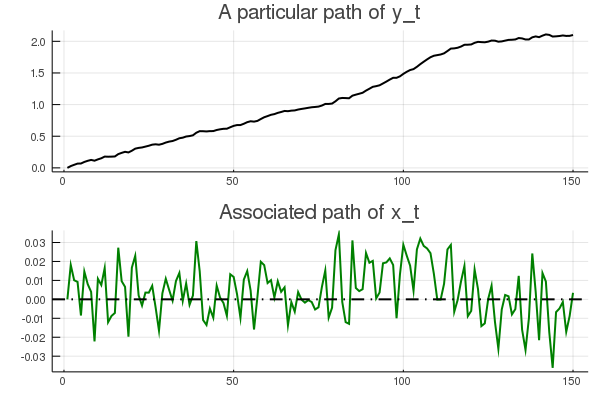

In [5]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.01
ν = 0.01 # taxa de crescimento

# A matriz A deve ser n x n
A = [ϕ_1 ϕ_2 ϕ_3 ϕ_4;
       1   0   0   0;
       0   1   0   0;
       0   0   1   0]

# A matriz B deve ser n x k
B = [σ, 0, 0, 0]

D = [1 0 0 0] * A
F = [1, 0, 0, 0] ⋅ vec(B)

amf = AMF_LSS_VAR(A, B, D, F, ν)

T = 150
x, y = simulate(amf.lss, T)

plots = plot(layout = (2, 1))

plot!(plots[1], 1:T, y[amf.nx + 1, :], color = :black, lw = 2, label = "")
plot!(plots[1], title =  "A particular path of y_t")
plot!(plots[2], 1:T, y[1, :], color = :green, lw = 2, label = "")
plot!(plots[2], seriestype = :hline, [0], color = :black, lw = 2, linestyle=:dashdot,
      label = "")
plot!(plots[2], title = "Associated path of x_t")

plot(plots)

Perceba o crescimento irregular, mas persistente de $ y_t $.

### Decomposição

Hansen e Sargent [[HS17]](https://julia.quantecon.org/../zreferences.html#hans-sarg-book2016) descrevem como construir uma funcional aditivo em quatro partes:

- uma constante herdada dos valores iniciais $ x_0 $ e $ y_0 $.
- uma tendência linear.
- um martingale.
- um componente estacionário (assintoticamente).


Para obter essa decomposição para a classe específica de funcionais aditivo definidas por [(1)](#equation-old1-additive-functionals) e [(2)](#equation-old2-additive-functionals), primeiro construimos as matrizes:

$$
\begin{aligned}
  H & := F + B'(I - A')^{-1} D
  \\
  g & := D' (I - A)^{-1}
\end{aligned}
$$

Então a decomposição de Hansen-Scheinkman [[HS09]](https://julia.quantecon.org/../zreferences.html#hans-scheink2009) é:

$$
\begin{aligned}
  y_t
  &= \underbrace{t \nu}_{\text{componente de tendência}} +
     \overbrace{\sum_{j=1}^t H z_j}^{\text{componetne de Martingale}} -
     \underbrace{g x_t}_{\text{componente estacionário}} +
     \overbrace{g x_0 + y_0}^{\text{condições iniciais}}
\end{aligned}
$$

Nesta etapa, você deve fazer uma parada e verificar se $ y_{t+1} - y_t $ satisfaz [(2)](#equation-old2-additive-functionals).

É conveniente introduzir a seguinte notação:

- $ \tau_t = \nu t $ , uma tendência determinística, linear. 
- $ m_t = \sum_{j=1}^t H z_j $, um martingale com tempo $ t+1 $ e incremento $ H z_{t+1} $.  
- $ s_t = g x_t $, um componente estacionário (assintoticamente). 


Queremos caracterizar e simular componentes $ \tau_t, m_t, s_t $ da decomposição.

Uma maneira conveniente de fazer isso é construir uma instância apropriada de um [sistema linear de espaço de estado](https://julia.quantecon.org/../tools_and_techniques/linear_models.html) usando [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) disponível em [QuantEcon.jl](http://quantecon.org/quantecon-jl).

Isso nos permitirá a usar as rotinas em [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) para estudar a dinâmica.

Para começar, observe que, sob a dinâmica em [(1)](#equation-old1-additive-functionals) e [(2)](#equation-old2-additive-functionals) e com as definições que acabamos de fornecer,

$$
\begin{bmatrix}
    1 \\
    t+1 \\
    x_{t+1} \\
    y_{t+1} \\
    m_{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 0 & 0 \\
    0 & 0 & A & 0 & 0 \\
    \nu & 0 & D' & 1 & 0 \\
    0 & 0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    1 \\
    t \\
    x_t \\
    y_t \\
    m_t
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    0 \\
    B \\
    F' \\
    H'
\end{bmatrix}
z_{t+1}
$$

e

$$
\begin{bmatrix}
    x_t \\
    y_t \\
    \tau_t \\
    m_t \\
    s_t
\end{bmatrix}
=
\begin{bmatrix}
    0 & 0 & I & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
    0 & \nu & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 \\
    0 & 0 & -g & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    1 \\
    t \\
    x_t \\
    y_t \\
    m_t
\end{bmatrix}
$$

Com

$$
\tilde{x} := \begin{bmatrix} 1 \\ t \\ x_t \\ y_t \\ m_t \end{bmatrix}
\quad \text{e} \quad
\tilde{y} := \begin{bmatrix} x_t \\ y_t \\ \tau_t \\ m_t \\ s_t \end{bmatrix}
$$

podemos escrever isso como um sistema linear de espaço de estado:

$$
\begin{aligned}
  \tilde{x}_{t+1} &= \tilde{A} \tilde{x}_t + \tilde{B} z_{t+1} \\
  \tilde{y}_{t} &= \tilde{D} \tilde{x}_t
\end{aligned}
$$

Escolhendo componentes de $ \tilde y_t $, podemos rastrear todas as variáveis de
interesse.

## Código

O tipo [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) mencionado acima faz tudo o que queremos estudar nosso funcional aditivo.

De fato [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) faz mais, como explicaremos abaixo.

(Uma dica de que ele faz mais é o nome do tipo - aqui AMF significa
“Funcionais aditivos e multiplicativos” - o código fará coisas para
funcionais multiplicativos também)

Vamos usar esse código (incorporado acima) para explorar o [exemplo do processo descrito acima](#addfunc-eg1).

Se você executar [o código que primeiro simulou esse exemplo](#addfunc-egcode) novamente e depois chamar o método
você irá gerar (módulo aleatoriedade) o gráfico.

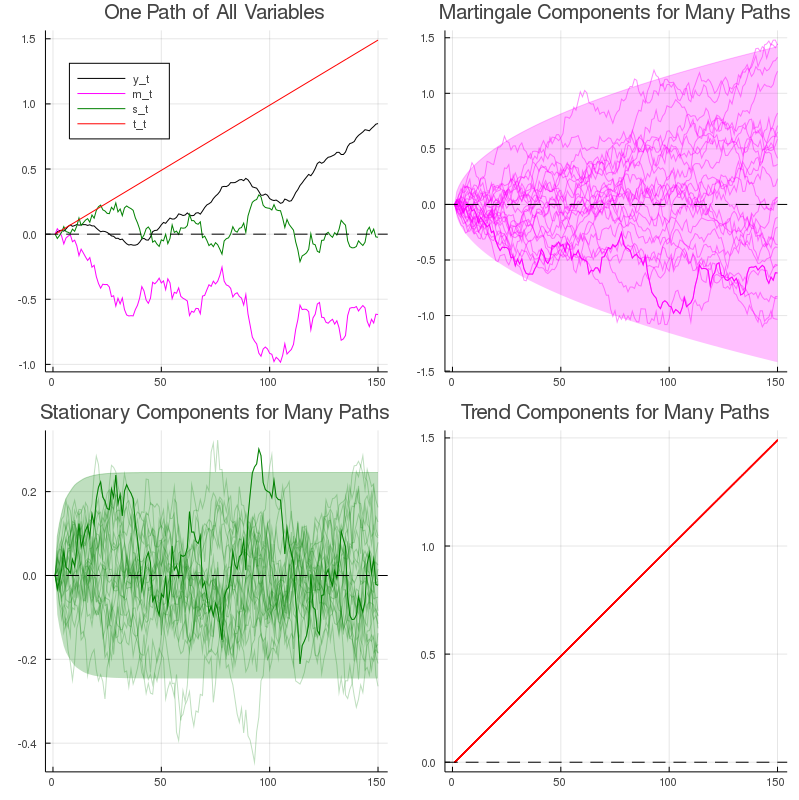

In [6]:
plt = plot_additive(amf, T)
plt[1]

Quando plotamos várias realizações de um componente nos painéis 2, 3 e 4, também plotamos conjuntos de cobertura de probabilidade de 95% da população calculados usando o tipo LSS.

Optamos por simular muitos caminhos, todos começando com as *mesmas* condições iniciais não aleatórias $ x_0, y_0 $ (você pode perceber isso pelo formato das áreas sombreadas com cobertura de probabilidade de 95%).

Observe sinais indicadores dessas áreas sombreadas de cobertura de probabilidade:

- O roxo para o componente martingale $ m_t $ cresce com
  $ \sqrt{t} $. 
- O verde para o componente estacionário $ s_t $ converge para uma
  banda constante.

### Um Funcional Multiplicativo Associado

Onde $ \{y_t\} $ é nosso funcional aditivo, seja $ M_t = \exp(y_t) $.

Como mencionado acima, o processo $ \{M_t\} $ é chamado de um **funcional multiplicativo**.

Correspondendo à decomposição aditiva descrita acima, temos a decomposição multiplicativa de $ M_t $:

$$
\frac{M_t}{M_0}
= \exp (t \nu) \exp \Bigl(\sum_{j=1}^t H \cdot Z_j \Bigr) \exp \biggl( D'(I-A)^{-1} x_0 - D'(I-A)^{-1} x_t \biggr)
$$

ou

$$
\frac{M_t}{M_0} =  \exp\left( \tilde \nu t \right) \Biggl( \frac{\widetilde M_t}{\widetilde M_0}\Biggr) \left( \frac{\tilde e (X_0)} {\tilde e(x_t)} \right)
$$

onde

$$
\tilde \nu =  \nu + \frac{H \cdot H}{2} ,
\quad
\widetilde M_t = \exp \biggl( \sum_{j=1}^t \biggl(H \cdot z_j -\frac{ H \cdot H }{2} \biggr) \biggr),  \quad \widetilde M_0 =1
$$

e

$$
\tilde e(x) = \exp[g(x)] = \exp \bigl[ D' (I - A)^{-1} x \bigr]
$$

Uma instância do tipo [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) inclui esse funcional multiplicativo associado como um atributo.

Vamos traçar esse funcional multiplicativo para o nosso exemplo.

Se você executar [o código que primeiro simulou esse exemplo](#addfunc-egcode) novamente e depois chamar o método.

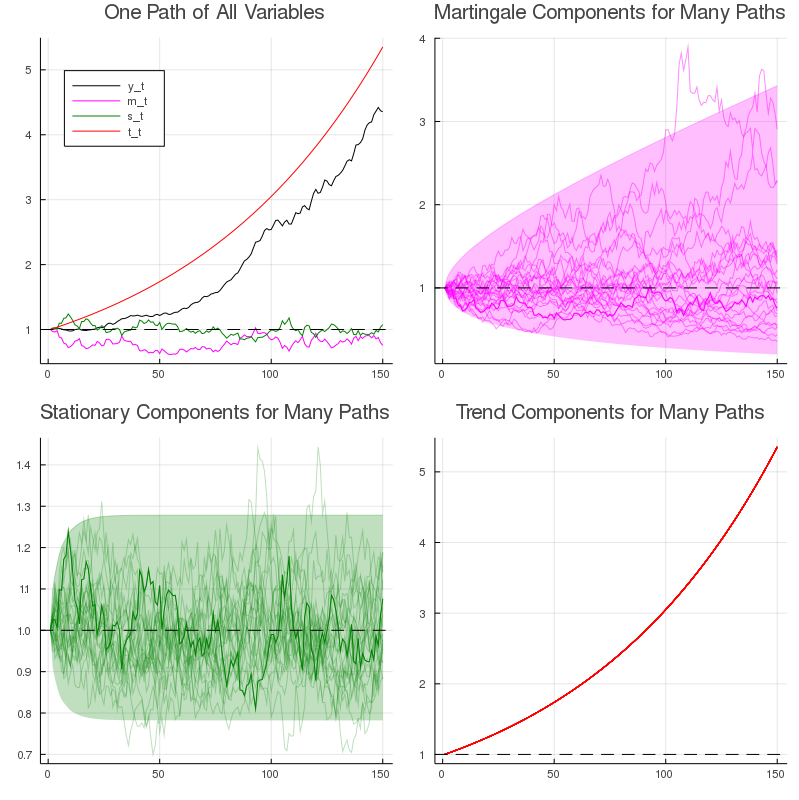

In [7]:
plt = plot_multiplicative(amf, T)
plt[1]

Como antes, quando plotamos várias realizações de um componente nos painéis 2, 3 e 4, também plotamos faixas de confiança de 95% da população calculadas usando o tipo LSS.

Comparar esse número e o último também ajuda a mostrar como o crescimento geométrico difere do
crescimento aritmético.

### Uma Propriedade Peculiar de Amostra Grande

Hansen e Sargent [[HS17]](https://julia.quantecon.org/../zreferences.html#hans-sarg-book2016) (cap. 6) observe que o componente martingale
$ \widetilde M_t $ da decomposição multiplicativa tem uma propriedade peculiar.

- Embora $ E_0 \widetilde M_t = 1 $ para todo $ t \geq 0 $,
  mesmo assim $ \ldots $.  
- Como $ t \rightarrow +\infty $, $ \widetilde M_t $ converge para
  zero quase certamente  


A seguinte simulação de muitos caminhos de $ \widetilde M_t $ ilustra essa propriedade.

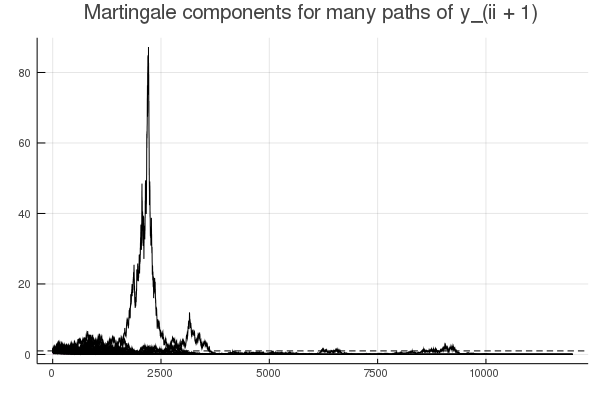

In [8]:
plt = plot_martingales(amf, 12000)
plt[1]